# 근처값으로 대체
---
- 시계열 변수 한정으로만 사용할 수 있는 방법
- 시계열 변수의 경우 결측이 바로 이전 값 혹은 이후 값과 유사할 가능성이 높다는 특성 때문
---
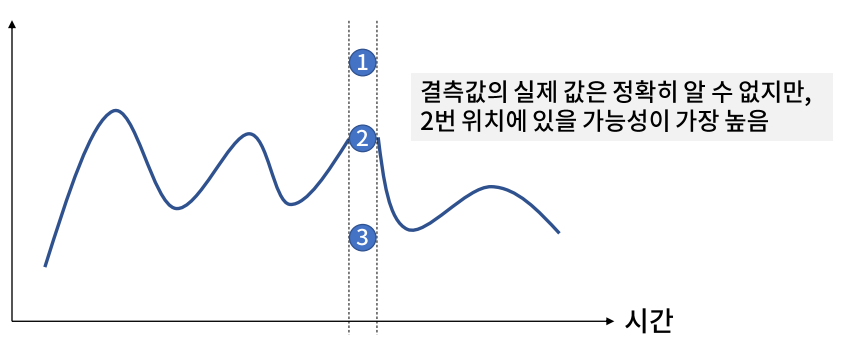

# 관련 문법 : DataFrame.fillna()
---
- 결측치를 특정 값이나 방법으로 채우는 함수

파라미터

---
- value : 결측치를 대체할 값
- method : 결측치를 대체할 방법
    - method='ffill' : `결측치 이전` 의 유효한 값 가운데 `가장 가까운 값` 으로 채움
    - method='bfill' : `결측치 이후` 의 유효한 값 가운데 `가장 가까운 값` 으로 채움
---

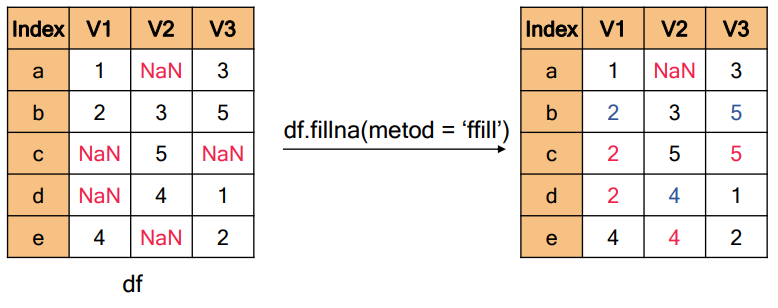

---
- method='ffill' 만을 쓸때의 맹점 : 결측치 이전에 값이 없을 때(결측치가 맨 앞의 값)
- method='bfill' 만을 쓸때의 맹점 : 결측치 이후에 값이 없을 때(결측치가 맨 뒤의 값)


- **이를 보완하기 위해 두개의 method를 동시에 써서 ffill로 값을 채워준 후 bffill로 나머지 NaN인 경우도 채워주는 함수를 쓴다.**

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
df = pd.read_excel("AirQuality.xlsx")

In [3]:
# 각 변수의 결측치 개수 확인
df.isnull().sum()

Date              0
Time              0
CO(GT)            1
PT08.S1(CO)       2
NMHC(GT)          2
C6H6(GT)         10
PT08.S2(NMHC)     4
NOx(GT)           6
PT08.S3(NOx)      7
NO2(GT)           6
PT08.S4(NO2)      6
PT08.S5(O3)       1
T                 0
RH                0
AH                0
dtype: int64

# 앞의 값 or 뒤의 값으로 결측치 채우기
---
 - 데이터를 train_test_split을 이용하여 임의로 분할한 경우에는 적용이 불가능
 - `분할하기 전에 결측치 대체가 가능한 유일한 케이스`

In [4]:
df = df.fillna(method = 'ffill').fillna(method = 'bfill')

In [5]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## bfill을 먼저 쓰고 ffill을 나중에 쓰면 안되는걸까?

- ffill을 먼저 사용하는 것이 더 바람직하다.
- 새로 들어온 데이터의 경우 바로 뒤의값을 참조하는 것이 어렵다.(새로 들어온 데이터 뒤에 데이터가 없기 때문)

## 시계열 결측치 대체(근처값 대체) 를 쓰기 어려운 경우
---

- 하나의 변수에만 결측치가 유독 몰려있는 경우(특히 연속해서 결측치가 발생한 경우), 근처의 값을 가져온다고 해도 그 값이 매우 멀리 떨어진 시계열상의 값일 수 있기 때문에 이 경우에는 부적절하다.